In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

In [2]:
np.random.seed(42)

customer_orders_weighted = pd.DataFrame({
    "CustomerID": np.arange(1, 1001),
    "OrderDate": pd.date_range(start="2023-01-01", periods=1000, freq="D"),
    "Repurchase": np.random.choice([0, 1], size=1000, p=[0.7, 0.3])
})

customer_orders_weighted["OrderAmount"] = np.where(
    customer_orders_weighted["Repurchase"] == 1,
    np.random.randint(500, 1000, size=1000),
    np.random.randint(10, 500, size=1000)
)

customer_orders_random = pd.DataFrame({
    "CustomerID": np.arange(1, 1001),
    "OrderDate": pd.date_range(start="2023-01-01", periods=1000, freq="D"),
    "Repurchase": np.random.choice([0, 1], size=1000, p=[0.7, 0.3]),
    "OrderAmount": np.random.randint(10, 1000, size=1000)
})

In [3]:
customer_orders_weighted

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,335
1,2,2023-01-02,1,511
2,3,2023-01-03,1,817
3,4,2023-01-04,0,388
4,5,2023-01-05,0,436
...,...,...,...,...
995,996,2025-09-22,0,140
996,997,2025-09-23,1,770
997,998,2025-09-24,0,227
998,999,2025-09-25,1,931


In [4]:
customer_orders_random

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,137
1,2,2023-01-02,0,831
2,3,2023-01-03,1,486
3,4,2023-01-04,1,769
4,5,2023-01-05,0,413
...,...,...,...,...
995,996,2025-09-22,1,347
996,997,2025-09-23,1,969
997,998,2025-09-24,1,175
998,999,2025-09-25,0,392


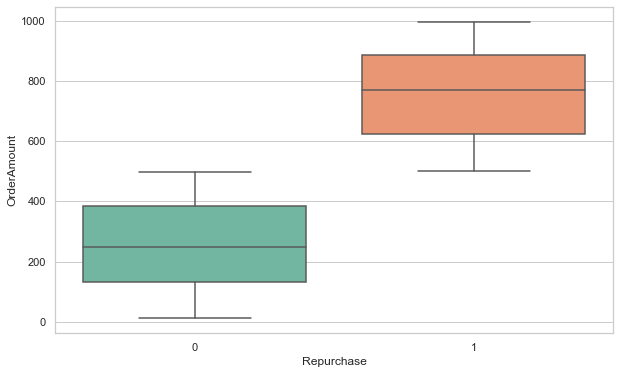

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(x='Repurchase', y ='OrderAmount', data = customer_orders_weighted, palette ='Set2')
plt.show()

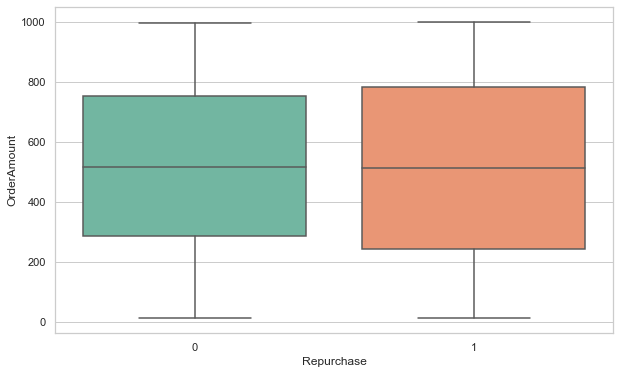

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Repurchase', y ='OrderAmount', data = customer_orders_random, palette ='Set2')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
#랜덤한 데이터를 학습해 보자!

X = customer_orders_random[['OrderAmount']]
y = customer_orders_random[['Repurchase']]

## trian,test 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [9]:
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

In [10]:
dt

DecisionTreeClassifier(random_state=111)

In [11]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [12]:
## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

0.555


### 랜덤하지 않은 데이터셋을 (가중치를 둔 데이터셋을 학습시키면 어떨까?)

In [13]:
X = customer_orders_weighted[['OrderAmount']]
y = customer_orders_weighted[['Repurchase']]

## trian,test 나누기

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

1.0


### 결측값을 만들어서, 해당 결측값을 다양하게 처리해 보고 실제 성능도 확인해 보자!

In [14]:
customer_orders_random

,CustomerID,OrderDate,Repurchase,OrderAmount
0,1,2023-01-01,0,137
1,2,2023-01-02,0,831
2,3,2023-01-03,1,486
3,4,2023-01-04,1,769
4,5,2023-01-05,0,413
...,...,...,...,...
995,996,2025-09-22,1,347
996,997,2025-09-23,1,969
997,998,2025-09-24,1,175
998,999,2025-09-25,0,392


In [15]:
missing_indices=np.random.choice(customer_orders_random.index, size= int(0.1 * len(customer_orders_random)), replace=False)
customer_orders_random.loc[missing_indices, 'OrderAmount'] = np.nan #na값으로 바꾼다

In [16]:
#isna().sum() na값이 존재한다.
customer_orders_random.isna().sum()

CustomerID       0
OrderDate        0
Repurchase       0
OrderAmount    100
dtype: int64

- 1. Remove NA -> 모델링
- 2. Replace NA with mean -> 모델링
- 3. Replace NA with KNN Imputer -> 모델링 (K, Nearest, Neighbors) 
    - 내 주변에 있는 k 값만 큼의 데이터를 확인해서 내 근처에 있는 값들의 평균 등으로 결측값을 대치한다.

In [17]:
# NA값 제거하기
X= customer_orders_random['OrderAmount'].values.reshape(-1,1)
y= customer_orders_random['Repurchase']

In [18]:
## NA값을 어떻게 나눌까?

X_no_na =X[~np.isnan(X[:,0])] # NA값이 아닌 X의 값
y_no_na =y[~np.isnan(X[:,0])] # NA값이 아닌 X의 인덱스 기준의 y의 값


X_train, X_test, y_train, y_test = train_test_split(X_no_na,y_no_na, test_size=0.2, random_state=111)
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)

## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print(acc)

0.5555555555555556


In [19]:
from sklearn.impute import KNNImputer

## NA값을 평균으로 대치 하는 것

X_maen_imputed =np.where(np.isnan(X), np.nanmean(X),X) # NA값을 평균으로 바꾸는 것  np.where
#y 값은 그대로 가지고 가도 된다. 

X_train, X_test, y_train, y_test = train_test_split(X_maen_imputed,y, test_size=0.2, random_state=111)
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)
## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print('평균으로 대치한 정확도',acc)

평균으로 대치한 정확도 0.6


In [20]:
# ## KNN의 경우는 스케일링이 필요하다. 
# from sklearn.preprocessing import StandardScaler
## KNN Imputer Model로 사용
## NA값 대치
## 패키지를 사용함
## KNN 디폴트 평균이라 아래 값으로 변경
knn_imputer = KNNImputer(n_neighbors = 3)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X) # 기존 데이터를 스케일링 작업 진행
X_knn_imputed = knn_imputer.fit_transform(X_scaled) # 결측치를 대치하기 위한 데이터 학습


X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed,y, test_size=0.2, random_state=111)
## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)
## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print('KNN Imputer 으로 대치한 정확도',acc)

KNN Imputer 으로 대치한 정확도 0.59


## 모델링에서 어떤 식으로 학습을 하는 것이고?
## 실제 이 성능을 개선하기 위해서는 어떻게 풀어야 할까?

- KNN Imputer 으로 대치한 정확도 0.59 
- 0.59 더 성능을 올려야해 -> 성능을 올려야 하는데.

In [21]:
df_sp=customer_orders_random[['Repurchase','OrderAmount']]

In [22]:
# 고유 고객 ID 생성
customer_ids = np.arange(1, 1001)

# 랜덤 주문 날짜 생성
random_order_dates = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 364)) for _ in range(1000)]

# 랜덤 주문 금액 생성 
# ㅁ오타 바꿔주세요
order_amounts = np.random.randint(10, 1000, size=1000)

# 주문 상태 생성 (결제 완료, 결제 대기, 주문 취소 중 랜덤 선택)
order_statuses = np.random.choice(["Completed", "Pending", "Cancelled"], size=1000, p=[0.6, 0.3, 0.1])

# 상품 카테고리 생성 (랜덤 선택)
product_categories = np.random.choice(["Electronics", "Clothing", "Food", "Household", "Books"], size=1000, p=[0.3, 0.2, 0.2, 0.2, 0.1])

# 결제 방식 생성 (랜덤 선택)
payment_methods = np.random.choice(["Credit Card", "Cash", "Points", "Bank Transfer"], size=1000, p=[0.5, 0.2, 0.2, 0.1])

# 지역 생성 (랜덤 선택)
regions = np.random.choice(["Seoul", "Gyeonggi", "Busan", "Daegu", "Gwangju"], size=1000, p=[0.4, 0.3, 0.1, 0.1, 0.1])

# 재구매 여부 생성 (0 또는 1)
repurchase = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])

# 데이터프레임 생성
data = {
    "CustomerID": customer_ids,
    "OrderDate": random_order_dates,
    "OrderAmount": order_amounts,
    "OrderStatus": order_statuses,
    "ProductCategory": product_categories,
    "PaymentMethod": payment_methods,
    "Region": regions,
    "Repurchase": repurchase
}

customer_orders = pd.DataFrame(data)

# 데이터프레임 확인
print(customer_orders.head())

   CustomerID  OrderDate  OrderAmount OrderStatus ProductCategory  \
0           1 2023-08-08          547   Completed     Electronics   
1           2 2023-11-14          930   Completed       Household   
2           3 2023-12-18           63   Cancelled       Household   
3           4 2023-02-07          550     Pending     Electronics   
4           5 2023-03-11          476   Completed     Electronics   

   PaymentMethod    Region  Repurchase  
0    Credit Card     Busan           1  
1         Points  Gyeonggi           0  
2  Bank Transfer  Gyeonggi           1  
3  Bank Transfer     Seoul           1  
4    Credit Card     Seoul           0  


In [23]:
customer_orders

,CustomerID,OrderDate,OrderAmount,OrderStatus,ProductCategory,PaymentMethod,Region,Repurchase
0,1,2023-08-08,547,Completed,Electronics,Credit Card,Busan,1
1,2,2023-11-14,930,Completed,Household,Points,Gyeonggi,0
2,3,2023-12-18,63,Cancelled,Household,Bank Transfer,Gyeonggi,1
3,4,2023-02-07,550,Pending,Electronics,Bank Transfer,Seoul,1
4,5,2023-03-11,476,Completed,Electronics,Credit Card,Seoul,0
...,...,...,...,...,...,...,...,...
995,996,2023-06-12,155,Completed,Books,Points,Seoul,0
996,997,2023-04-10,627,Completed,Electronics,Credit Card,Gyeonggi,0
997,998,2023-09-05,784,Pending,Electronics,Cash,Seoul,1
998,999,2023-08-16,305,Cancelled,Electronics,Credit Card,Gyeonggi,0


In [24]:
from sklearn.preprocessing import LabelEncoder

data = customer_orders.drop(['CustomerID','OrderDate'],axis = 1)

le = LabelEncoder() 

for col in ['OrderStatus','ProductCategory','PaymentMethod','Region']:
    data[col] = le.fit_transform(data[col])
    
X = data.drop('Repurchase',axis =1)
y = data['Repurchase']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

# ## DT 의사결정나무
dt = DecisionTreeClassifier(random_state=111)
dt.fit(X_train, y_train)
## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc = accuracy_score(y_test, y_pred)
print('새로운 데이터셋 정확도 평가',acc)

새로운 데이터셋 정확도 평가 0.595


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51032 missing from c

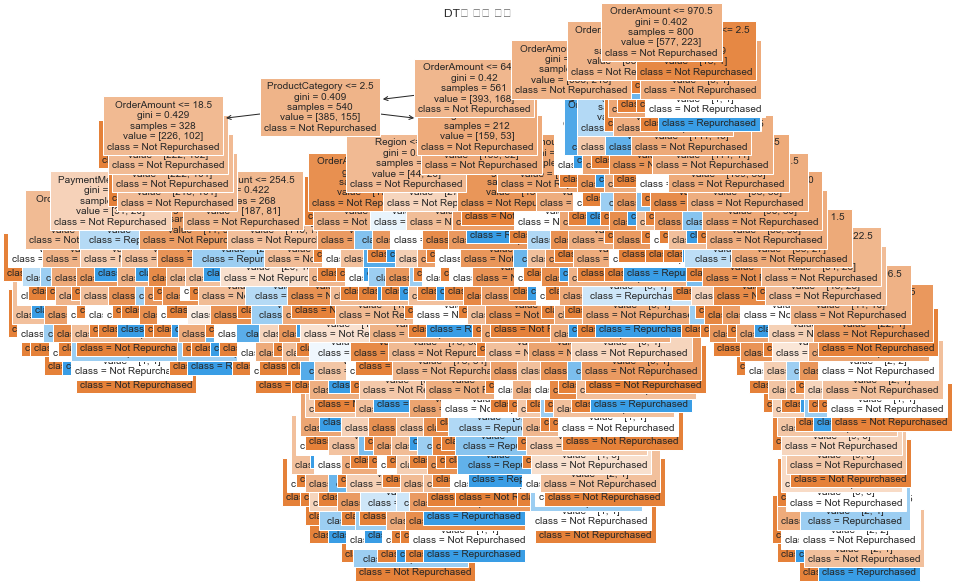

In [25]:
## 모델링의 시각적인 이해를 위해 패키지 사용
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt, feature_names = X.columns , class_names = ['Not Repurchased','Repurchased'], filled =True, fontsize=10)
plt.title('DT의 학습 이해')
plt.show()

### 데이터 너무 과적합이 되었기 때문에 데이터 과적합을 막기 위한 모델 튜닝을 하고 
### 다시 학습하면 -> 실제로 성능이 개선이 되는가?
### 어떤 식으로 과적합을 막는가? - 모델이 어떻게 학습하는가?!

In [26]:
## 모델이 과적합하지 않기 위해 모델의 하이퍼파라미터를 조절하면 된다.

dt = DecisionTreeClassifier(max_depth = 5,min_samples_split =10,min_samples_leaf=5, random_state=111)
dt.fit(X_train, y_train)
## y_pred
y_pred = dt.predict(X_test)

## 정확도 평가
acc =accuracy_score(y_test, y_pred)
print('새로운 데이터셋 정확도 평가',acc)

새로운 데이터셋 정확도 평가 0.68


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51032 missing from c

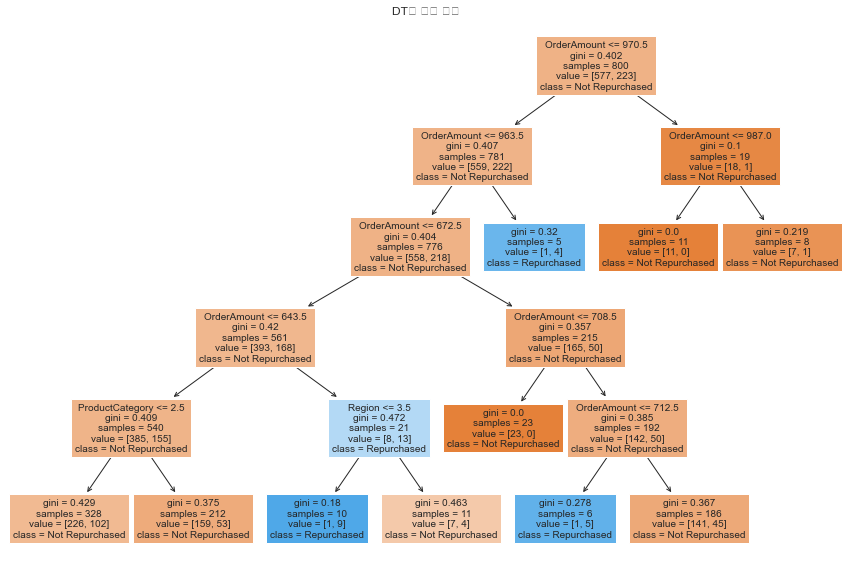

In [27]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names = X.columns , class_names = ['Not Repurchased','Repurchased'], filled =True, fontsize=10)
plt.title('DT의 학습 이해')
plt.show()

In [29]:
## Decision Tree 내에서 Feature Importances 뽑아준다.

## dt.feature_importances_ 피처 중요도 

importances=dt.feature_importances_
importances

array([0.81513897, 0.        , 0.04457183, 0.        , 0.1402892 ])

In [30]:
X

,OrderAmount,OrderStatus,ProductCategory,PaymentMethod,Region
0,547,1,2,2,0
1,930,1,4,3,3
2,63,0,4,0,3
3,550,2,2,0,4
4,476,1,2,2,4
...,...,...,...,...,...
995,155,1,0,3,4
996,627,1,2,2,3
997,784,2,2,1,4
998,305,0,2,2,3


In [31]:
data

,OrderAmount,OrderStatus,ProductCategory,PaymentMethod,Region,Repurchase
0,547,1,2,2,0,1
1,930,1,4,3,3,0
2,63,0,4,0,3,1
3,550,2,2,0,4,1
4,476,1,2,2,4,0
...,...,...,...,...,...,...
995,155,1,0,3,4,0
996,627,1,2,2,3,0
997,784,2,2,1,4,1
998,305,0,2,2,3,0
